# Rainfall composite
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton Univeristy

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

from geoplots import mapplot, xticks2lon, yticks2lat
from climindex import get_mjo

from scipy.stats import ttest_1samp

In [2]:
%matplotlib notebook

In [3]:
# data: precip
ncfile = 'chirps-v2.0.days_p05.28E36E_02S06N.nc'
precip = xr.open_mfdataset(ncfile).precip.load().rename({'longitude': 'lon', 'latitude': 'lat'})
da = precip

In [4]:
# data: mosquito abundance
df = pd.read_csv('MJO_Abundance.csv', index_col=0, parse_dates=True)
df['month'] = df.index.month
df = df[(df['month']>=3) & (df['month']<=5)]
print(df.head())
print('sample size:', df.index.size)

time_base = df.index
ts = df['Average specimens']
time_e = df[ts>ts.quantile(.85)].index

            Date_Number  MJO Phase  Average specimens  month
Date                                                        
2012-03-06        40974          4                1.0      3
2012-03-07        40975          4                1.5      3
2012-03-08        40976          4                1.0      3
2012-03-09        40977          4                1.8      3
2012-03-20        40988          6                8.5      3
sample size: 152


<IPython.core.display.Javascript object>


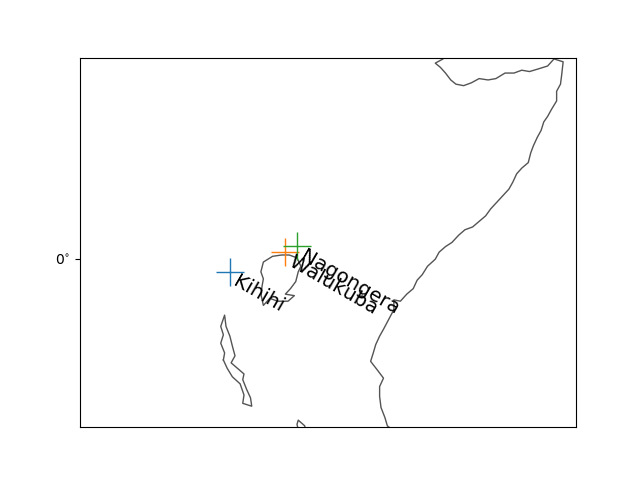

In [5]:
sites = [('Kihihi', -0.748889, 29.7003), # name, lat, lon
         ('Walukuba', 0.447222, 33.2367),
         ('Nagongera', .77, 34.0261)]
mapplot(lon=(20,52), lat=(-10,12))
for site in sites:
    plt.plot(site[2], site[1], marker='+', markersize=20)
    plt.text(site[2], site[1], site[0], 
             ha='left', va='top', fontsize='x-large', rotation=-30)

## composite

In [7]:
# data: prcp composite for differnet MJO phases
da = precip
da_base = da.sel(time=time_base).mean('time')
da_e = da.sel(time=time_e) - da_base
tt, pvalues = ttest_1samp(da_e, 0)

<IPython.core.display.Javascript object>


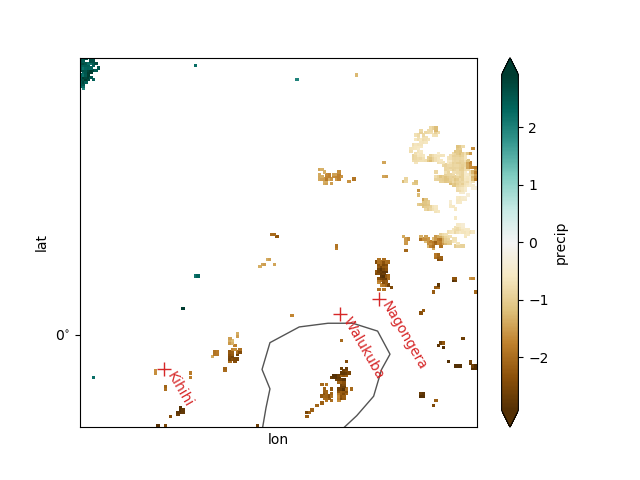

In [12]:
# fig
da_e.mean('time').where(pvalues<.05).plot(cmap='BrBG', robust=True, )
mapplot()
for site in sites:
        plt.plot(site[2], site[1], marker='+', markersize=10, color='C3')
        plt.text(site[2], site[1], site[0], 
             ha='left', va='top', color='C3', rotation=-60)

## composite, precip one day leads

In [24]:
# data: prcp composite for differnet MJO phases
das = dict()
pvalues = dict()

precip_lead_days = range(0, 9)
da = precip
da_base = da.sel(time=time_base).mean('time')

for d in precip_lead_days:
    da_e = da.sel(time=time_e.shift(-d,'D')) - da_base
    tt, pp = ttest_1samp(da_e, 0)
    das[d] = da_e.mean('time')
    pvalues[d] = xr.DataArray(pp, dims=das[d].dims, coords=[das[d][dim] for dim in das[d].coords])

<IPython.core.display.Javascript object>


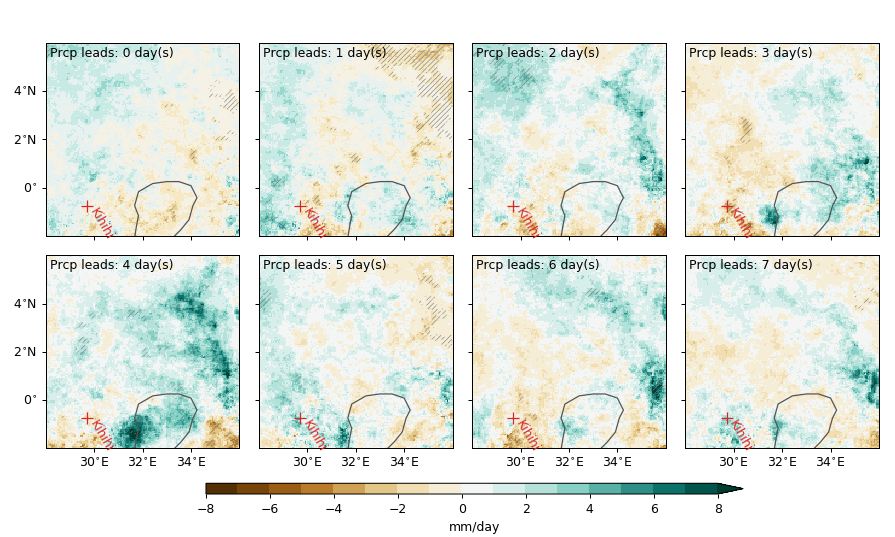

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [43]:
# fig: prcp composite
fig, axes = plt.subplots(2,4, sharex=True, sharey=True, figsize=(10,6))
for i,ax in enumerate(axes.flat):
    plt.sca(ax)
    im = das[i].plot(cmap='BrBG',robust=True, 
                                    levels=np.arange(-8,8.1,1),
                                    add_colorbar=False)
    pvalues[i].where(pvalues[i]<.05).pipe(lambda x: x*0).geo.fxyplot(plot_type='hatches',
                                                                     hatches=['//////'])
    mapplot(lon=das[i].lon, lat=das[i].lat)
    for site in sites[0:1]:
        plt.plot(site[2], site[1], marker='+', markersize=10, color='C3')
        plt.text(site[2], site[1], site[0], 
             ha='left', va='top', color='C3', rotation=-60)
    
    plt.text(.02, .98, f'Prcp leads: {i} day(s)', ha='left', va='top', transform=ax.transAxes)
    
    plt.xlabel('')
    plt.ylabel('')
    

plt.sca(axes[1,0])
yticks2lat(range(0,6,2))
xticks2lon(range(30,36,2))

# plt.suptitle(f'{years[0]}-{years[1]} {season} CHIRPS prcp anomaly composite according to MJO phase')

ax = fig.add_axes((.23,.08,.6,.02))
plt.colorbar(im, cax=ax, orientation='horizontal', label='mm/day')

plt.tight_layout(rect=(0,.1,1,.95))

<IPython.core.display.Javascript object>


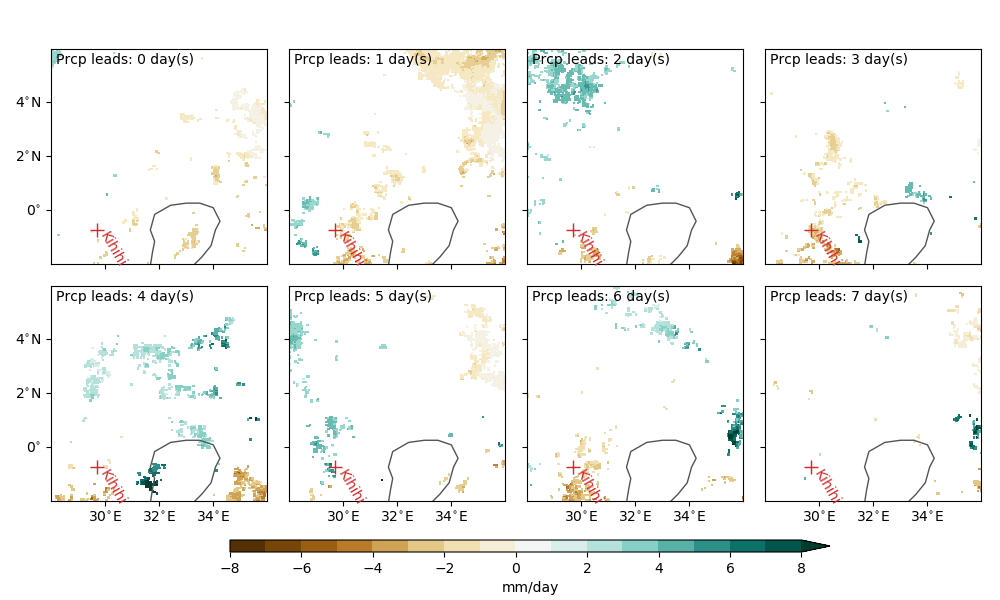

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [45]:
# fig: prcp composite
fig, axes = plt.subplots(2,4, sharex=True, sharey=True, figsize=(10,6))
for i,ax in enumerate(axes.flat):
    plt.sca(ax)
    im = das[i].where(pvalues[i]<.05).plot(cmap='BrBG',robust=True, 
                                    levels=np.arange(-8,8.1,1),
                                    add_colorbar=False)
    mapplot(lon=das[i].lon, lat=das[i].lat)
    for site in sites[0:1]:
        plt.plot(site[2], site[1], marker='+', markersize=10, color='C3')
        plt.text(site[2], site[1], site[0], 
             ha='left', va='top', color='C3', rotation=-60)
    
    plt.text(.02, .98, f'Prcp leads: {i} day(s)', ha='left', va='top', transform=ax.transAxes)
    
    plt.xlabel('')
    plt.ylabel('')
    

plt.sca(axes[1,0])
yticks2lat(range(0,6,2))
xticks2lon(range(30,36,2))

# plt.suptitle(f'{years[0]}-{years[1]} {season} CHIRPS prcp anomaly composite according to MJO phase')

ax = fig.add_axes((.23,.08,.6,.02))
plt.colorbar(im, cax=ax, orientation='horizontal', label='mm/day')

plt.tight_layout(rect=(0,.1,1,.95))